# Leveraging data analytics and machine learning to improve customer satisfaction
--- 

Jose Oliveira da Cruz | jose [at] jfocruz [dot] com



## Index of Jupyter Notebook: `nb01_data-exploration.ipynb`
---
- [Background](#background)
- [Data Cleaning and Wrangling](#data-cleaning)
- [Exploratory Data Analysis](#eda)








<a id="background"><a/>
# Background
---

A world-renowned e-commerce company requires 24/7 support handling tickets about different issues. The company would like to focus on five important KPIs:  
1. Customer Satisfaction (CSAT)
2. First Contact Resolution
3. Contacts per Case
4. Full Resolution Time
5. Reply Time 
    
**How data could be used to improve Customer Satisfaction?**
    
- Can we predict CSAT based on available variables? If yes, which variables are important? (`nb02_modeling-part1.ipynb`)
- Are there differences in CSAT based on agents’ experience? If yes, how do agents experience reflects on CSAT (`nb01_data-exploration.ipynb`: this notebook)?
- What are three main complaints in case of tickets with bad CSAT based on customers? (`nb03_modeling-part2.ipynb`)

In [1]:
# Load libraries
import os
import datetime
import missingno as msno # to visualize missing data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set random state
np.random.seed(42)


save_figs = True
plt.style.use('ggplot')
fig_kwargs = dict(bbox_inches='tight')

# color code for the plots
colors = {'Bad': '#E24A33', 'Good': '#348ABD'}

<a id="data-cleaning"><a/>

# Data Cleaning and Wrangling
---

In [2]:
agents_fp = r'../data/raw/agents.csv'
tickets_fp = r'../data/raw/tickets.csv'

In [3]:
df_agents = pd.read_csv(agents_fp, parse_dates=['AgentStartingDate'])
df_agents.columns = df_agents.columns.str.lower()

df_tickets = pd.read_csv(tickets_fp, parse_dates=['TicketCreationDate'])
df_tickets.columns = df_tickets.columns.str.lower()

In [4]:
df_agents.head(5)

,agentid,agentstartingdate,function,country,education
0,1246,2016-09-30,Agent,Serbia,Humanities
1,1247,2015-09-15,Agent,United States,Humanities
2,1248,2016-07-22,Agent,United States,Engineering
3,1249,2015-02-04,Agent,Turkey,Engineering
4,1250,2019-11-16,Agent,United States,IT


In [5]:
df_tickets.head(5)

,ticket_number,resolution,agentid,cpc,firstcontactresolution,fullresolutiontime,replytime,problem,ticketcreationdate,satisfaction,comment
0,13371,1.0,1412.0,3.0,0.0,7.0,239.0,Payment processing,NaT,Good,eficient player mode
1,12525,NaN,1532.0,7.0,0.0,3.0,504.0,Wrong password,NaT,Offered,NaN
2,12480,1.0,1921.0,4.0,0.0,3.0,284.0,Item do not show,2021-05-27,Good,eficient item
3,14764,NaN,1535.0,2.0,0.0,11.0,1008.0,Compromited account,2021-06-22,Offered,NaN
4,14611,NaN,1319.0,3.0,0.0,9.0,NaN,NaN,2021-07-05,Offered,N / A


## `agents_df`
---

In [6]:
df_agents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   agentid            807 non-null    int64         
 1   agentstartingdate  807 non-null    datetime64[ns]
 2   function           807 non-null    object        
 3   country            807 non-null    object        
 4   education          807 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 31.6+ KB


In [7]:
# drop redundant columns
print(df_agents.nunique()) # function column contains only 1 element > it can be removed
print('Removing redundant columns (columns with no important information)...')
df_agents = df_agents.drop(columns='function')

print(df_agents.nunique())

print('DONE.')

agentid              807
agentstartingdate    696
function               1
country               10
education             11
dtype: int64
Removing redundant columns (columns with no important information)...
agentid              807
agentstartingdate    696
country               10
education             11
dtype: int64
DONE.


In [8]:
# reconvert dtypes
df_agents = df_agents.astype({'country': 'category', 'education': 'category'})

# verify dtypes
df_agents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   agentid            807 non-null    int64         
 1   agentstartingdate  807 non-null    datetime64[ns]
 2   country            807 non-null    category      
 3   education          807 non-null    category      
dtypes: category(2), datetime64[ns](1), int64(1)
memory usage: 15.1 KB


In [9]:
# What is the percentage of missing data?
df_agents.isna().sum(axis=0)

agentid              0
agentstartingdate    0
country              0
education            0
dtype: int64

There is **no missing data** in the **agents dataframe**.

In [10]:
df_agents.head()

,agentid,agentstartingdate,country,education
0,1246,2016-09-30,Serbia,Humanities
1,1247,2015-09-15,United States,Humanities
2,1248,2016-07-22,United States,Engineering
3,1249,2015-02-04,Turkey,Engineering
4,1250,2019-11-16,United States,IT


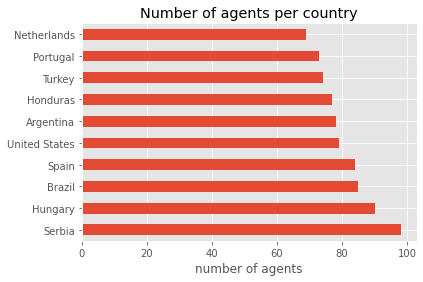

In [11]:
fig, ax = plt.subplots()

df_agents.country.value_counts().plot(kind='barh', ax=ax,)

ax.set(xlabel='number of agents', title='Number of agents per country')
ax.tick_params('y', rotation=0)

if save_figs:
    plt.savefig(r'../reports/figures/agents_per_country.jpeg', **fig_kwargs)

In [12]:
print(f'There are {df_agents.agentid.nunique()} unique agents,',
      f'\nlocated in {df_agents.country.nunique()} countries,'
      f'\nfrom at least {df_agents.education.nunique()-1} different educational backgrounds.')

There are 807 unique agents, 
located in 10 countries,
from at least 10 different educational backgrounds.


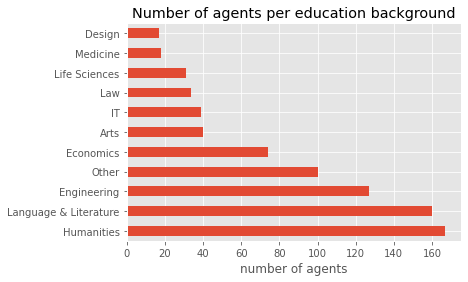

In [13]:
fig, ax = plt.subplots()

df_agents.education.value_counts().plot(kind='barh', ax=ax,)

ax.set(xlabel='number of agents', title='Number of agents per education background')
ax.tick_params('y', rotation=0)

if save_figs:
    plt.savefig(r'../reports/figures/agents_per_edu_background.jpeg', **fig_kwargs)

## `df_tickets`
---

In [14]:
df_tickets.head()

,ticket_number,resolution,agentid,cpc,firstcontactresolution,fullresolutiontime,replytime,problem,ticketcreationdate,satisfaction,comment
0,13371,1.0,1412.0,3.0,0.0,7.0,239.0,Payment processing,NaT,Good,eficient player mode
1,12525,NaN,1532.0,7.0,0.0,3.0,504.0,Wrong password,NaT,Offered,NaN
2,12480,1.0,1921.0,4.0,0.0,3.0,284.0,Item do not show,2021-05-27,Good,eficient item
3,14764,NaN,1535.0,2.0,0.0,11.0,1008.0,Compromited account,2021-06-22,Offered,NaN
4,14611,NaN,1319.0,3.0,0.0,9.0,NaN,NaN,2021-07-05,Offered,N / A


In [15]:
total_n_tickets = df_tickets.ticket_number.nunique()

print(f"The total number of available tickets is: {total_n_tickets}")

The total number of available tickets is: 5532


In [16]:
# Recast dtypes
df_tickets = df_tickets.astype({
    'problem': 'category', 
    'satisfaction': 'category'
})

<AxesSubplot:>

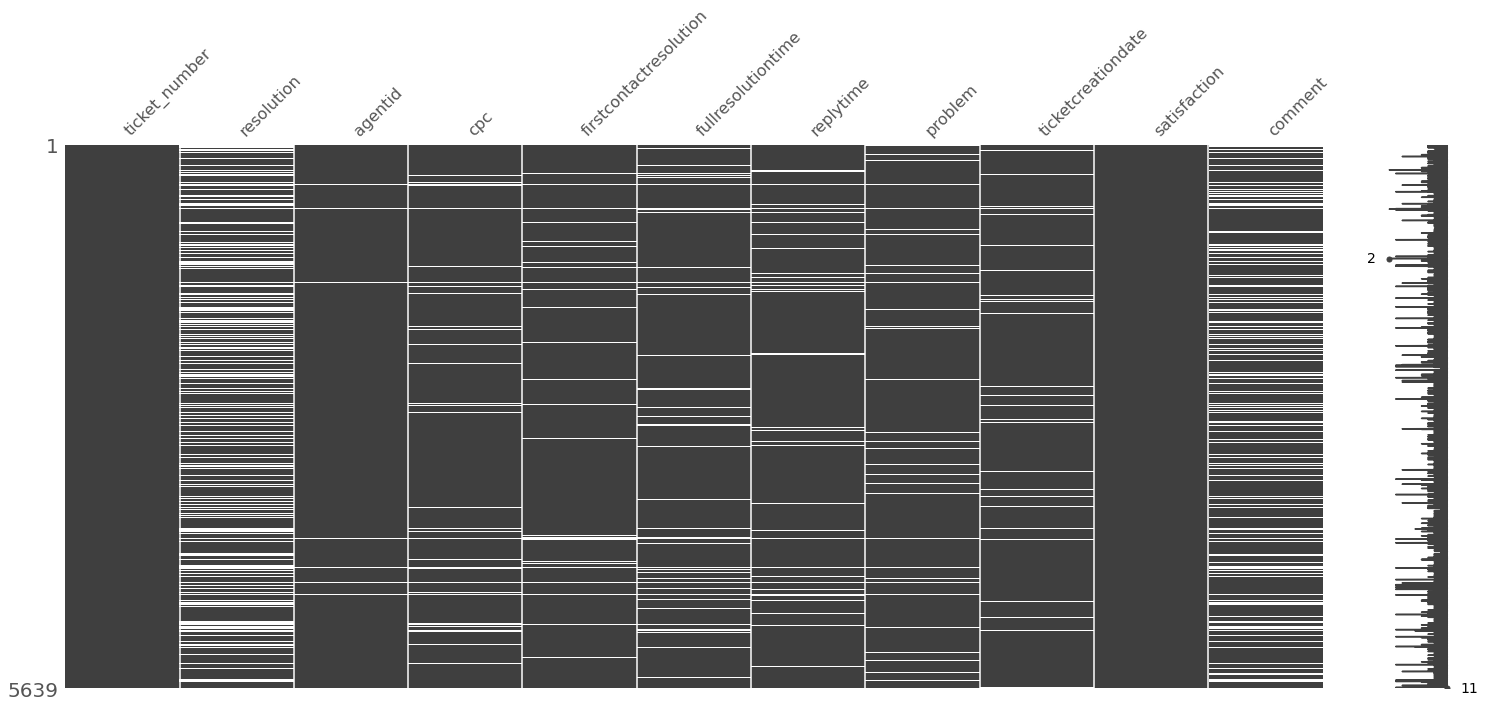

In [17]:
# Visualize the missing data
import missingno as msno
msno.matrix(df_tickets)

In [18]:
# Percentage of missing data in df_tickets
(df_tickets.isna().sum() / df_tickets.shape[0] * 100).round(2).sort_values(ascending=False)

resolution                30.48
comment                   20.73
problem                    6.12
replytime                  5.91
firstcontactresolution     5.83
fullresolutiontime         5.75
cpc                        5.67
ticketcreationdate         5.07
agentid                    1.01
ticket_number              0.00
satisfaction               0.00
dtype: float64

There is some missing data with `resolution` and `comment` being 2 top categories.

In [19]:
# How many tickets have missing agentid?
print('Number of tickets with missing agentid:', df_tickets.agentid.isna().sum())

Number of tickets with missing agentid: 57


<AxesSubplot:>

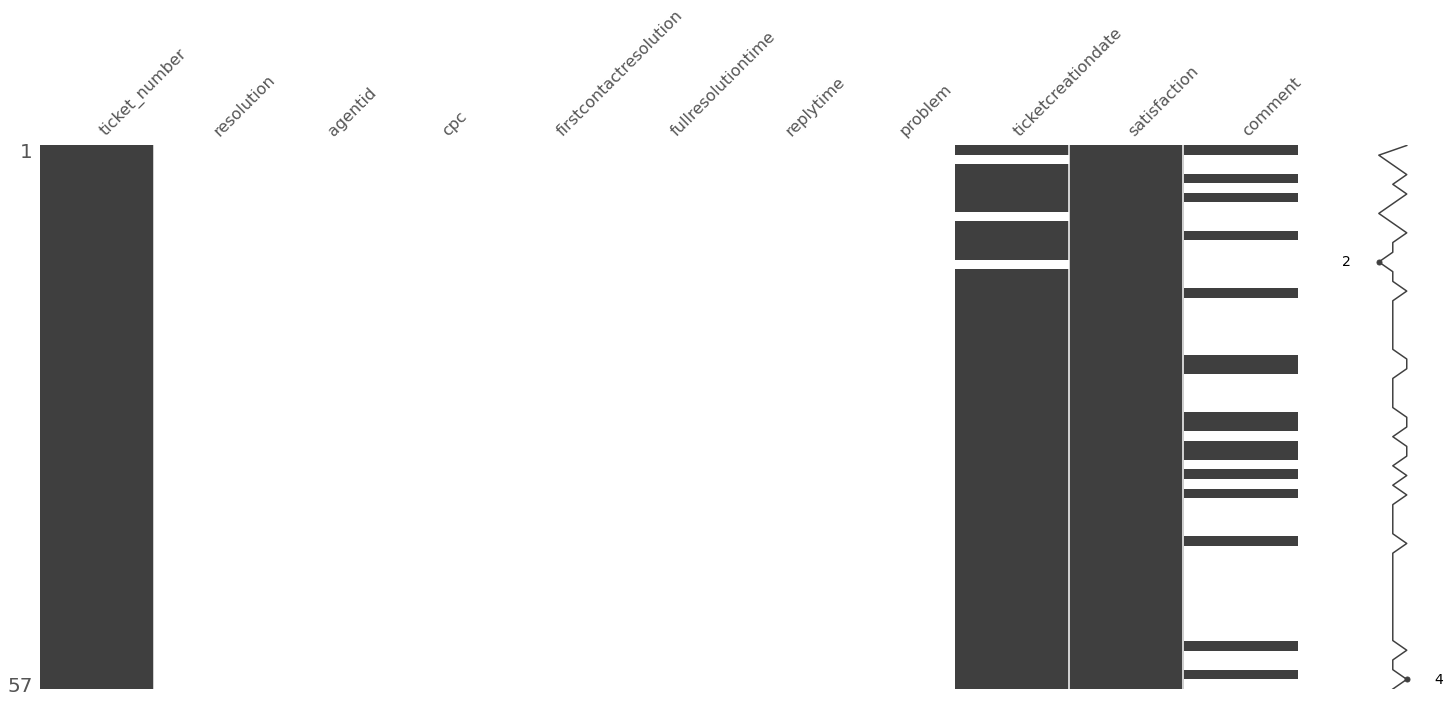

In [20]:
msno.matrix(df_tickets[df_tickets.agentid.isna()])

In [21]:
# drop tickets that have large chunks of missing data
df_tickets = df_tickets[~df_tickets.agentid.isna()]

In [22]:
# What is the percentage of tickets that are duplicated?
n_duplicated_tickets = df_tickets.ticket_number.duplicated().sum()
n_total_tickets = df_tickets.ticket_number.size

print('Number of duplicated tickets:', n_duplicated_tickets)

perc_duplicated_tickets = round(n_duplicated_tickets / n_total_tickets * 100, 2)

print(f'Percentage of duplicated tickets: {perc_duplicated_tickets}%' )

Number of duplicated tickets: 107
Percentage of duplicated tickets: 1.92%


In [23]:
# Drop duplicated tickets since they represent a minority of the data
df_tickets = df_tickets[~df_tickets.ticket_number.duplicated()]

In [24]:
# How many tickets have unknown resolution (ie NaN)?
df_tickets.resolution.value_counts(dropna=False, normalize=True) * 100

1.0    59.178082
NaN    29.662100
0.0    11.159817
Name: resolution, dtype: float64

<AxesSubplot:>

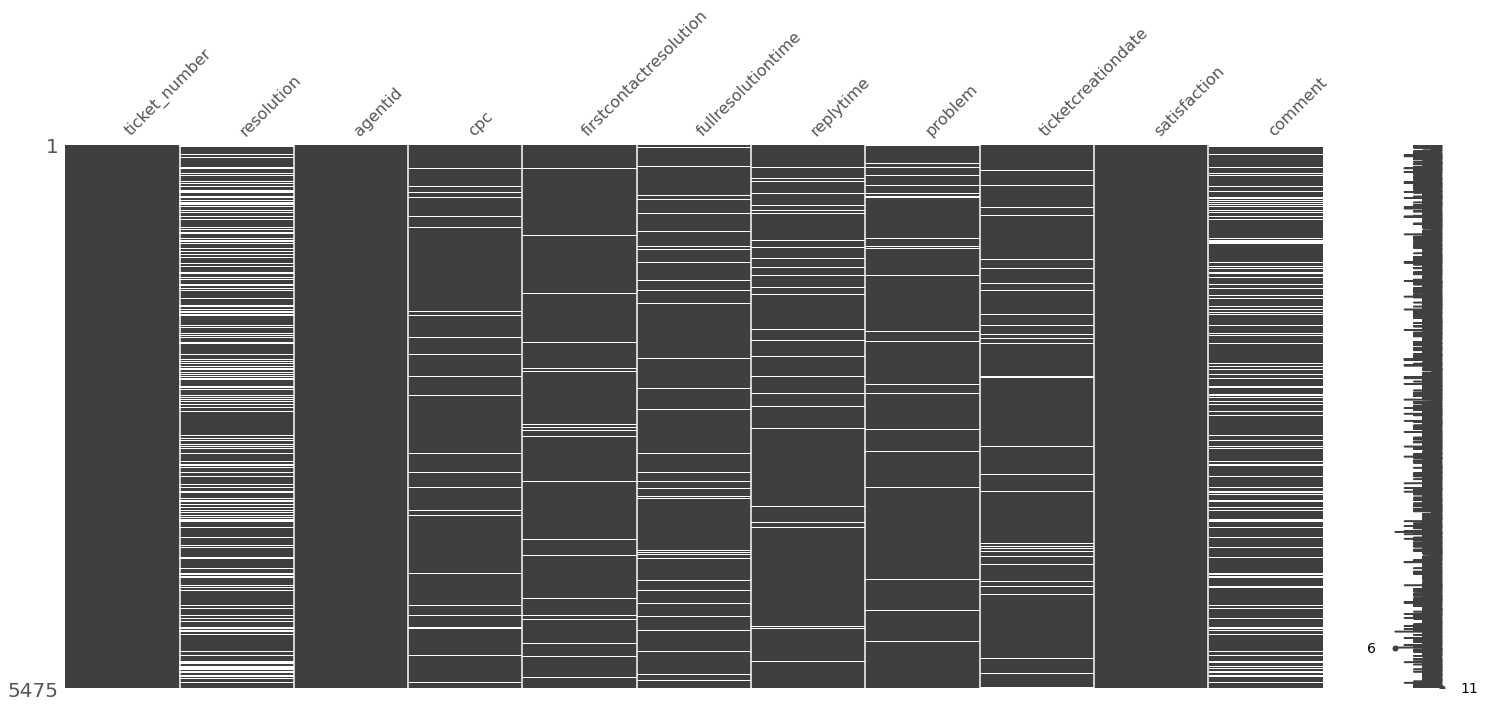

In [25]:
# Plot Dataframe with missing data after removing missing agentid and duplicated tickets
msno.matrix(df_tickets)

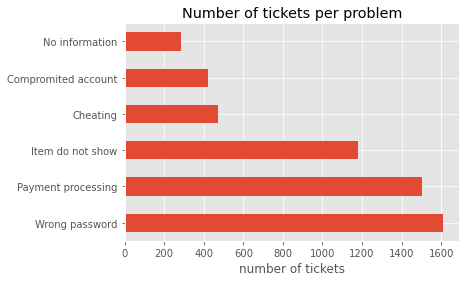

In [26]:
fig, ax = plt.subplots()

n_tickets_per_problem = df_tickets.problem.value_counts(dropna=False).rename(index={np.nan: 'No information'})

n_tickets_per_problem.plot(kind='barh', ax=ax,)

ax.set(xlabel='number of tickets', title='Number of tickets per problem')
ax.tick_params('y', rotation=0)

if save_figs:
    plt.savefig(r'../reports/figures/n_tickets_per_problem.jpeg', **fig_kwargs)

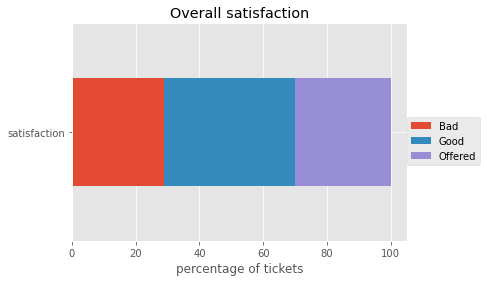

In [27]:
# How is satisfaction accross tickets?
perc_tickets_per_satisfaction = df_tickets.satisfaction.value_counts(normalize=True).round(2) * 100

fig, ax = plt.subplots()

perc_tickets_per_satisfaction.reset_index()\
                             .pivot_table(values='satisfaction', columns='index')\
                             .plot(kind='barh', stacked=True, ax=ax)

ax.set(xlabel='percentage of tickets', title='Overall satisfaction')
ax.tick_params('y', rotation=0)

plt.legend(loc=(1, .35))

if save_figs:
    plt.savefig(r'../reports/figures/percentage_satisfaction.jpeg', **fig_kwargs)

In [28]:
# Filter tickets by satisfaction in good or bad:
filtered_tickets = df_tickets[~df_tickets.satisfaction.isin(['Offered'])].copy()

# tickets with missing CSAT data
tickets_without_csat = df_tickets[df_tickets.satisfaction.isin(['Offered'])].copy()

In [29]:
filtered_tickets.to_csv('../data/interim/tickets_withCSAT_preprocessed.csv')
tickets_without_csat.to_csv('../data/interim/tickets_withoutCSAT_preprocessed.csv')

Merge datasets: `agents` + `tickets`

In [30]:
df_agents.rename(columns={'country': 'agent_country',
                          'education': 'agent_education',
                          'agentstartingdate': 'agent_startingdate'}, 
                 inplace=True)

In [31]:
dataset = pd.merge(filtered_tickets, df_agents, how='left', on='agentid')

In [32]:
# Create a variable that contains the number of days an agent was on role before ticket creation 
dataset['agent_daysonrole'] = dataset['ticketcreationdate'] - dataset['agent_startingdate']

# reconvert datatype
dataset['agent_daysonrole'] = dataset['agent_daysonrole'].dt.days

In [33]:
dataset.to_csv('../data/processed/merged_datasets.csv')

<a id="eda"><a/>
# Exploratory Data Analysis
---
This analysis will focus on tickets with known CSAT scores.

In [34]:
# Read the data
df_tickets_with_satisfaction = pd.read_csv('../data/processed/merged_datasets.csv', index_col=0)

In [35]:
n_tickets_with_satisfaction = df_tickets_with_satisfaction.ticket_number.nunique()

print(f"The total number of available tickets is: {n_tickets_with_satisfaction}")
print(f"This corresponds to {n_tickets_with_satisfaction/total_n_tickets *100 :.2f} % of the total amount of tickets.")

The total number of available tickets is: 3851
This corresponds to 69.61 % of the total amount of tickets.


### Q. How many unique agents are represented in the tickets dataset with CSAT?

In [36]:
agents = df_tickets_with_satisfaction.agentid.unique()

print('The number of unique agents in the tickets dataset with CSAT is', agents.size)

The number of unique agents in the tickets dataset with CSAT is 84


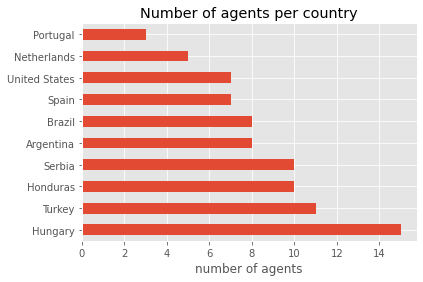

In [37]:
fig, ax = plt.subplots()

df_agents[df_agents.agentid.isin(agents)].agent_country.value_counts().plot(kind='barh', ax=ax,)

ax.set(xlabel='number of agents', title='Number of agents per country')
ax.tick_params('y', rotation=0)

In [38]:
df_tickets_with_satisfaction.head()

,ticket_number,resolution,agentid,cpc,firstcontactresolution,fullresolutiontime,replytime,problem,ticketcreationdate,satisfaction,comment,agent_startingdate,agent_country,agent_education,agent_daysonrole
0,13371,1.0,1412.0,3.0,0.0,7.0,239.0,Payment processing,NaN,Good,eficient player mode,2019-10-08,Brazil,Law,NaN
1,12480,1.0,1921.0,4.0,0.0,3.0,284.0,Item do not show,2021-05-27,Good,eficient item,2015-04-10,Brazil,Humanities,2239.0
2,15615,1.0,1377.0,2.0,0.0,29.0,1021.0,NaN,2021-06-24,Bad,inefficient product,2015-06-18,Hungary,Engineering,2198.0
3,11106,1.0,1360.0,2.0,0.0,2.0,184.0,Item do not show,2021-06-15,Good,pleasant agent's communication,2017-12-26,Argentina,Law,1267.0
4,12483,1.0,1646.0,3.0,0.0,12.0,15.0,Wrong password,2021-08-20,Good,nicee resolution...,2017-06-14,Serbia,Language & Literature,1528.0


### Q. What is customer satisfaction with the service?

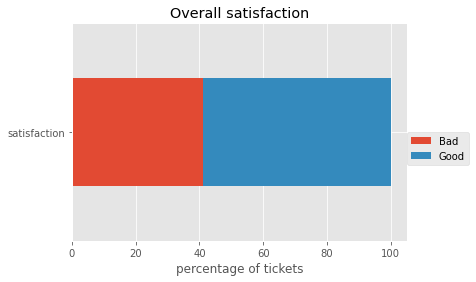

In [39]:
# get percentage overall satisfaction 
overall_satisfaction = df_tickets_with_satisfaction.satisfaction\
                                                   .value_counts(normalize=True)\
                                                   .iloc[:2].mul(100).round(2)


fig, ax = plt.subplots()

# Rearrange the data to plot
overall_satisfaction.reset_index()\
                    .pivot_table(values='satisfaction', columns='index')\
                    .plot(kind='barh', stacked=True, ax=ax)

ax.set(xlabel='percentage of tickets', title='Overall satisfaction')
ax.tick_params('y', rotation=0)
plt.legend(loc=(1, .35))

if save_figs:
    plt.savefig(r'../reports/figures/perc_overall_satisfaction.jpeg', **fig_kwargs)

In [40]:
print('The overall % satisfaction is:')
overall_satisfaction

The overall % satisfaction is:


Good    58.84
Bad     41.16
Name: satisfaction, dtype: float64

### Q. What kind of problems are associated with good/bad CSAT scores?

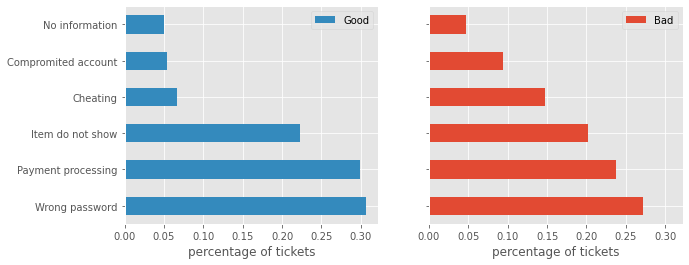

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True, sharex=True)

for idx, rating in enumerate(df_tickets_with_satisfaction.satisfaction.unique()):

    df_tickets_with_satisfaction[df_tickets_with_satisfaction.satisfaction.isin([rating])].problem\
                                                             .value_counts(dropna=False, normalize=True)\
                                                             .rename(index={np.nan: 'No information'})\
                                                             .plot(kind='barh', ax=ax[idx], color=colors.get(rating), label=f'{rating}')

    ax[idx].set(xlabel='percentage of tickets')
    ax[idx].legend()

if save_figs:
    plt.savefig(r'../reports/figures/top_problems_with_per_review.jpeg', **fig_kwargs)

In [42]:
problems_in_bad_reviews = df_tickets_with_satisfaction[df_tickets_with_satisfaction.satisfaction.isin(['Bad'])].problem\
                                                                                   .value_counts(dropna=False, normalize=True)\
                                                                                   .rename(index={np.nan: 'No information'})

# What is the proportion of bad reviews that encompasses the top 3 complaints?
print('The percentage of the bad reviews that encompass the top 3 problems is',
      problems_in_bad_reviews.iloc[:3].mul(100).sum().round(2), '%') 

The percentage of the bad reviews that encompass the top 3 problems is 71.17 %


## KPI: Contacts per Case (CPC) & First contact resolution

- Was the ticket solved during first contact?

- How does it compare across problems?

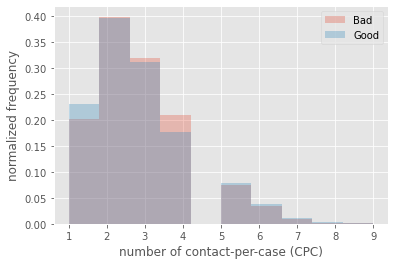

In [43]:
# Extract cpc data
cpc_good_csat = df_tickets_with_satisfaction[df_tickets_with_satisfaction.satisfaction.isin(['Good'])].cpc
cpc_bad_csat = df_tickets_with_satisfaction[df_tickets_with_satisfaction.satisfaction.isin(['Bad'])].cpc


fig, ax = plt.subplots()

cpc_bad_csat.plot(kind='hist', alpha=0.3, density=True, ax=ax, label='Bad')
cpc_good_csat.plot(kind='hist', alpha=0.3, density=True, ax=ax, label='Good')

ax.set(ylabel='normalized frequency', xlabel='number of contact-per-case (CPC)')

ax.legend()

if save_figs:
    plt.savefig(r'../reports/figures/cpc_good_bad_csat.jpeg', **fig_kwargs)

In [44]:
print(f'The median number of cpc for Bad CSAT is {cpc_bad_csat.median()}.')
print(f'The median number of cpc for Good CSAT is {cpc_good_csat.median()}.')

The median number of cpc for Bad CSAT is 3.0.
The median number of cpc for Good CSAT is 2.0.


### Q. What about the number of first contact resolution?

In [45]:
# Let's have a look at the first contact resolution
df_tickets_with_satisfaction.firstcontactresolution.value_counts(dropna=False, normalize=True)

0.0    0.782914
1.0    0.167489
NaN    0.049598
Name: firstcontactresolution, dtype: float64

There are some **missing data on the firstcontactresolution** that can imputed based on cpc (no missing data).  
If cpc == 1, then firstcontactresolution == 1, else 0




In [46]:
# Iterate over the dataframe rows
for row in df_tickets_with_satisfaction.iterrows():
    
    # if the cpc is ==1 then first firstcontactresolution == 1
    if row[1]['cpc'] == 1:
        df_tickets_with_satisfaction.loc[row[0], 'firstcontactresolution'] = 1
    else:
        df_tickets_with_satisfaction.loc[row[0], 'firstcontactresolution'] = 0

In [47]:
# Let's check the result
df_tickets_with_satisfaction.firstcontactresolution.value_counts(dropna=False, normalize=True)

0.0    0.824981
1.0    0.175019
Name: firstcontactresolution, dtype: float64

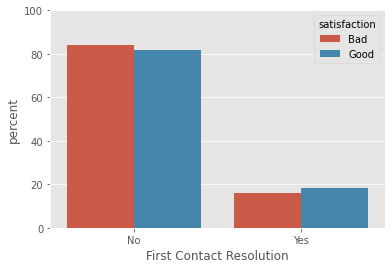

In [48]:
# Check the percentage of data resolved with firstcontactresolution
data = (df_tickets_with_satisfaction.groupby('satisfaction')['firstcontactresolution']
                                    .value_counts(normalize=True)
                                    .mul(100).round(2)
                                    .rename('percent')
                                    .reset_index())

fig, ax = plt.subplots()

sns.barplot(data=data, y='percent', x='firstcontactresolution', hue='satisfaction', palette=['C0', 'C1'], ax=ax)

ax.set(ylim=(0, 100), xlabel='First Contact Resolution',  xticklabels=['No', 'Yes'])


if save_figs:
    plt.savefig(r'../reports/figures/perc_first_contact_resolution.jpeg', **fig_kwargs)

### Q. What about the full resolution time (in days)?

First let's have a look at the KPIs, independently of the CSAT score.

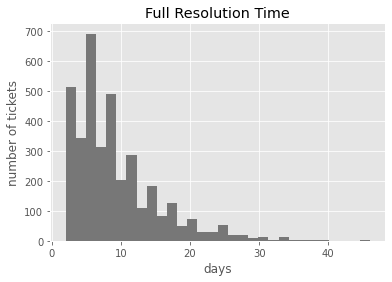

In [49]:
fig, ax = plt.subplots()

df_tickets_with_satisfaction.fullresolutiontime.plot(kind='hist', bins=30, color='C3', ax=ax, )

ax.set(title='Full Resolution Time', xlabel='days', ylabel='number of tickets')

plt.show()

In [50]:
# statistics
message = 'More than 50% of the cases take at least {} days to be resolved.'

print(message.format(df_tickets_with_satisfaction.fullresolutiontime.median()))

More than 50% of the cases take at least 7.0 days to be resolved.


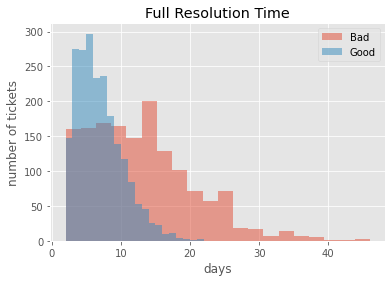

In [51]:
fig, ax = plt.subplots()

for idx, rating in enumerate(['Bad', 'Good']):
    
    # subset data by each CSAT category
    bool_condition = df_tickets_with_satisfaction.satisfaction.isin([rating])
    
    df_tickets_with_satisfaction[bool_condition].fullresolutiontime.plot(kind='hist',
                                                                         bins=20,
                                                                         color=colors.get(rating),
                                                                         ax=ax,
                                                                         alpha=.50,
                                                                         label=rating)

    ax.set(title='Full Resolution Time', xlabel='days', ylabel='number of tickets')
    
    ax.legend()
    
if save_figs:
    plt.savefig(r'../reports/figures/global_full_resolution_time.jpeg', **fig_kwargs)

### Q. What are the issues that take longer?

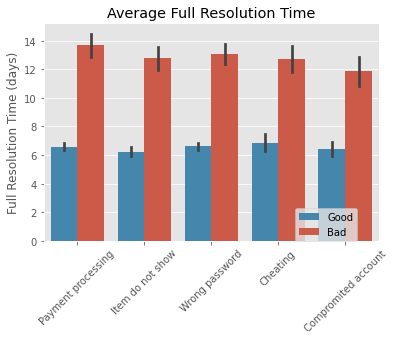

In [52]:
fig, ax = plt.subplots()


sns.barplot(data=df_tickets_with_satisfaction,
            x='problem', y='fullresolutiontime',
            hue='satisfaction',
            ax=ax,
            palette=['#348ABD', '#E24A33', ])

ax.set(ylabel='Full Resolution Time (days)', title='Average Full Resolution Time', xlabel='')
ax.tick_params('x', rotation=45)

ax.legend(loc=(.75, 0))


if save_figs:
    plt.savefig(r'../reports/figures/average_full_resolution_time.jpeg', **fig_kwargs)

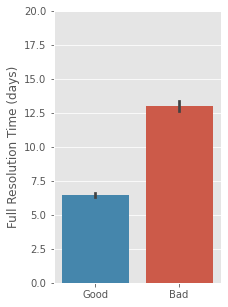

In [53]:
fig, ax = plt.subplots(figsize=(3, 5))

sns.barplot(data=df_tickets_with_satisfaction,
            x='satisfaction',
            y='fullresolutiontime',
            palette=['#348ABD', '#E24A33', ])

ax.set(ylim=(0, 20), ylabel='Full Resolution Time (days)', xlabel='')

if save_figs:
    plt.savefig(r'../reports/figures/avg_bar_fullresolutiontime.jpeg', **fig_kwargs)

In [54]:
mean_resolution_time_good = df_tickets_with_satisfaction[df_tickets_with_satisfaction.satisfaction.isin(['Good'])].fullresolutiontime.mean()



mean_resolution_time_bad = df_tickets_with_satisfaction[df_tickets_with_satisfaction.satisfaction.isin(['Bad'])].fullresolutiontime.mean()

In [55]:
diff = round(mean_resolution_time_bad - mean_resolution_time_good, 2)


print(f'Tickets with bad CSAT take an additional {diff} days to get resolved.')

Tickets with bad CSAT take an additional 6.55 days to get resolved.


### Q. How long do agents take to reply?

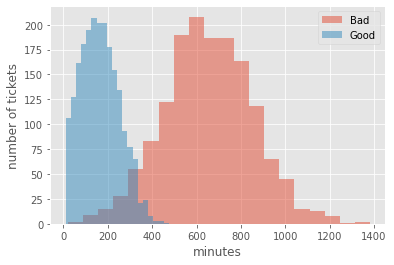

In [56]:
fig, ax = plt.subplots()

for idx, rating in enumerate(['Bad', 'Good']):

    bool_condition = df_tickets_with_satisfaction.satisfaction.isin([rating])
    
    df_tickets_with_satisfaction[bool_condition].replytime.plot(kind='hist',
                                                                bins=20,
                                                                color=colors.get(rating),
                                                                ax=ax,
                                                                alpha=.50,
                                                                label=rating)

    ax.set(xlabel='minutes', ylabel='number of tickets')
    
    ax.legend()
    
if save_figs:
    plt.savefig(r'../reports/figures/global_replytime_time.jpeg', **fig_kwargs)

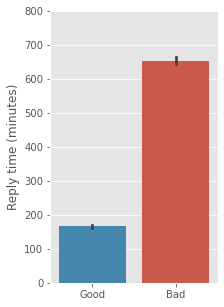

In [57]:
fig, ax = plt.subplots(figsize=(3, 5))

sns.barplot(data=df_tickets_with_satisfaction,
            x='satisfaction',
            y='replytime',
            palette=['#348ABD', '#E24A33', ])

ax.set(ylim=(0, 800), ylabel='Reply time (minutes)', xlabel='')

if save_figs:
    plt.savefig(r'../reports/figures/replytime_bar.jpeg', **fig_kwargs)

In [58]:
mean_response_time = df_tickets_with_satisfaction.groupby('satisfaction')\
                                                 .agg(mean_response_time=('replytime', np.mean))

In [59]:
diff = mean_response_time.loc['Bad'] - mean_response_time.loc['Good']

print('It takes around an additional 487 minutes for customer to get a reply on tickets with BAD CSAT scores. ')

It takes around an additional 487 minutes for customer to get a reply on tickets with BAD CSAT scores. 


### Q. Does the full resolution time or reply time vary depending of the problem?

In [60]:
replytime_per_problem = df_tickets_with_satisfaction.groupby(['satisfaction', 'problem'])\
                                                    .agg(avg_responsetime=('replytime', 'mean'))\
                                                    .reset_index()
print(replytime_per_problem)

  satisfaction              problem  avg_responsetime
0          Bad             Cheating        640.873303
1          Bad  Compromited account        694.007092
2          Bad     Item do not show        633.583871
3          Bad   Payment processing        666.655647
4          Bad       Wrong password        645.691748
5         Good             Cheating        170.660550
6         Good  Compromited account        169.183673
7         Good     Item do not show        162.002105
8         Good   Payment processing        166.729560
9         Good       Wrong password        168.010542


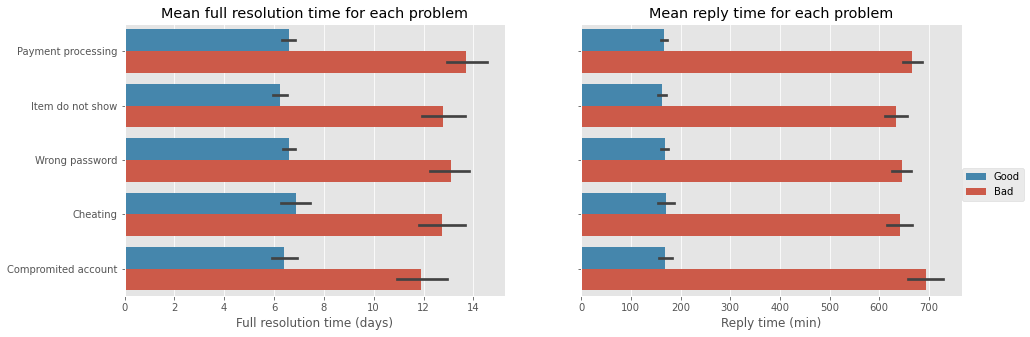

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# LEFT PLOT
sns.barplot(y='problem',
            x='fullresolutiontime',
            data=df_tickets_with_satisfaction,
            hue='satisfaction',
            palette=['C1', 'C0',],
            ax=ax[0])

ax[0].set(ylabel='', xlabel='Full resolution time (days)', title='Mean full resolution time for each problem')

ax[0].legend(loc=(1, .35)).remove()

# RIGHT PLOT
sns.barplot(y='problem',
            x='replytime',
            data=df_tickets_with_satisfaction,
            hue='satisfaction',
            palette=['C1', 'C0',],
            ax=ax[1])

ax[1].set(ylabel='', xlabel='Reply time (min)', title='Mean reply time for each problem')

ax[1].legend(loc=(1, .35))



if save_figs:
    plt.savefig(r'../reports/figures/mean_fullresolutiontimeANDreplytime_per_problem.jpeg', **fig_kwargs)

### Q. Is there any correlation between `replytime` and `fullresolutiontime`?

It seems that replytime is not correlated with fullresolutiontime. This means that agents can take longer to answer to a problem that is closed in just few days, and vice-versa.

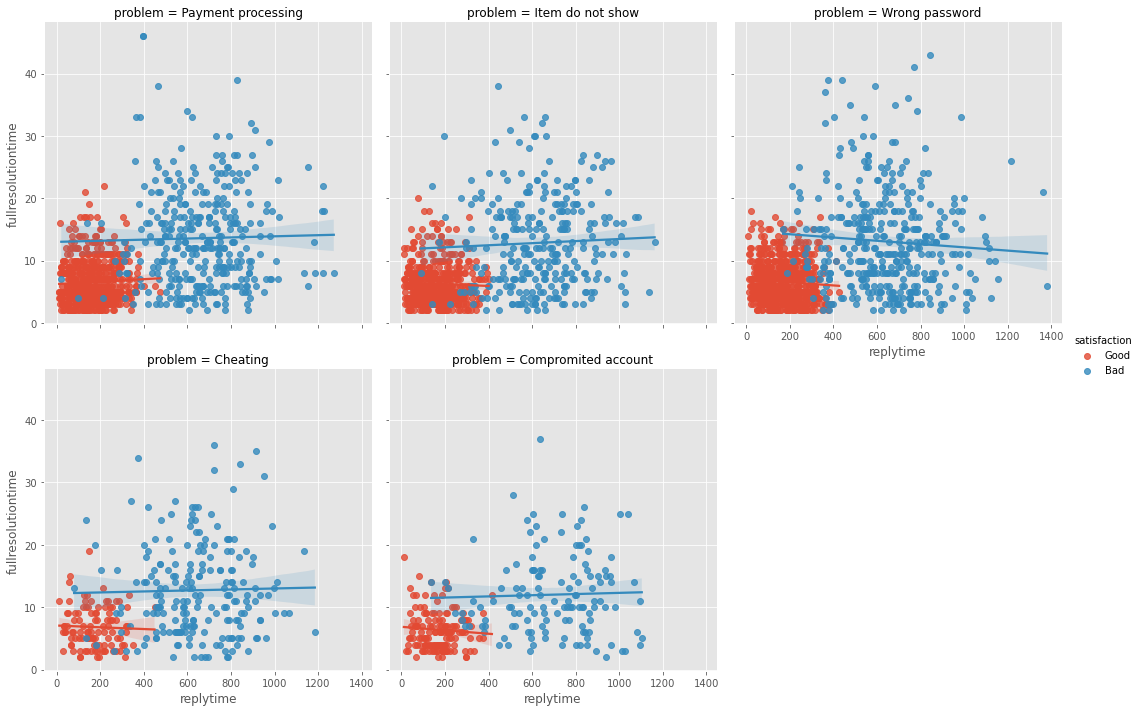

In [62]:
sns.lmplot(x='replytime',
           y='fullresolutiontime',
           data=df_tickets_with_satisfaction,
           hue='satisfaction',
           col='problem',
           col_wrap=3)
plt.show()

### Q. What are the distribution of tickets across time? 

In [63]:
# Extract the timeseries (ticketcreation date) and satisfaction
timeseries = df_tickets_with_satisfaction[['ticketcreationdate', 'satisfaction']].dropna()\
                                                                                 .sort_values(by='ticketcreationdate')

In [64]:
# How many CSAT ratings per day
n_scores_timeseries = timeseries.groupby(['ticketcreationdate', 'satisfaction'])\
                                .agg(n_reviews=('satisfaction', 'count'))\
                                .reset_index()

In [65]:
# How many CSAT ratings per day for each CSAT
good_scores = n_scores_timeseries[n_scores_timeseries.satisfaction.isin(['Good'])].set_index('ticketcreationdate')\
                                                                                  .drop(columns='satisfaction')

bad_scores = n_scores_timeseries[n_scores_timeseries.satisfaction.isin(['Bad'])].set_index('ticketcreationdate')\
                                                                                .drop(columns='satisfaction')

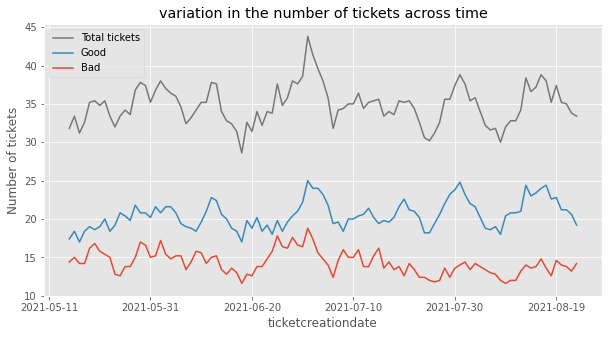

In [66]:
# plot the timeseries 
fig, ax = plt.subplots(figsize=(10, 5))

# overall tickets
timeseries.groupby('ticketcreationdate')\
          .count()\
          .rolling(5)\
          .mean()\
          .plot(ax=ax, color='C3')

# tickets with bad scores
good_scores.rolling(5)\
           .mean()\
           .plot(ax=ax, color='C1')

# tickets with good scores
bad_scores.rolling(5)\
          .mean()\
          .plot(ax=ax, color='C0')

ax.set(title='variation in the number of tickets across time', ylabel='Number of tickets')


ax.legend(labels=['Total tickets', 'Good', 'Bad'])

if save_figs:
    plt.savefig(r'../reports/figures/timeseries_tickets.jpeg', **fig_kwargs)

### Q. What is the experience of the agent at the time of reply?

Are there differences in CSAT based on agents’ experience? 

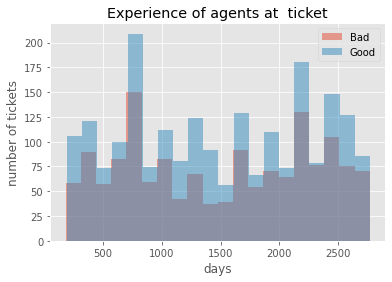

In [67]:
fig, ax = plt.subplots()

for idx, rating in enumerate(['Bad', 'Good']):

    bool_condition = df_tickets_with_satisfaction.satisfaction.isin([rating])
    
    df_tickets_with_satisfaction[bool_condition].agent_daysonrole.plot(kind='hist',
                                                                       bins=20,
                                                                       color=colors.get(rating),
                                                                       ax=ax,
                                                                       alpha=.50,
                                                                       label=rating)

    ax.set(xlabel='days', ylabel='number of tickets', title='Experience of agents at  ticket')
    
    ax.legend()
    
if save_figs:
    plt.savefig(r'../reports/figures/days_on_role.jpeg', **fig_kwargs)

In [68]:
print('Mean days of agents on role per CSAT score is:')
df_tickets_with_satisfaction.groupby(['satisfaction'])['agent_daysonrole'].mean().astype(int)

Mean days of agents on role per CSAT score is:


satisfaction
Bad     1495
Good    1486
Name: agent_daysonrole, dtype: int32

In [69]:
agent_experience = df_tickets_with_satisfaction.groupby(['satisfaction', 'agentid'])\
                                               .agg(agent_experience=('agent_daysonrole', 'mean'))\
                                               .reset_index()

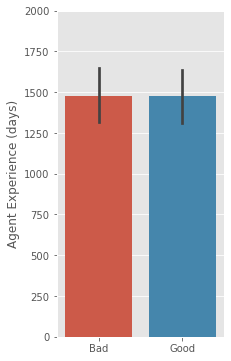

In [70]:
fig, ax = plt.subplots(figsize=(3, 6))

sns.barplot(x='satisfaction', y='agent_experience', data=agent_experience, ax=ax)

ax.set(ylabel='Agent Experience (days)', xlabel='', ylim=(0, 2000))

if save_figs:
    plt.savefig(r'../reports/figures/agent_experience_bar.jpeg', **fig_kwargs)

### Q. Are there specific agents with poor performance?

In [71]:
# get bad CSAT tickets
badCSAT_tickets = df_tickets_with_satisfaction[df_tickets_with_satisfaction.satisfaction.isin(['Bad'])]

# Group by agentid and compute total bad reviews
agents_with_badCSAT_tickets = badCSAT_tickets.groupby('agentid')\
                                             .agg(total_bad_reviews=('agentid','count'))\
                                             .reset_index()\
                                             .sort_values(by='total_bad_reviews', ascending=False)

# get total tickets to calculate proportions
total_tickets_per_agent = df_tickets_with_satisfaction.groupby(['agentid'])\
                                                      .agg(total_n_tickets=('agentid','count'),
                                                           mean_reply_time=('replytime','mean'),
                                                           mean_full_resolution_time=('fullresolutiontime', 'mean'))\
                                                      .reset_index()

# Merge the datasets
proportion_csat_tickets_agent = pd.merge(agents_with_badCSAT_tickets,
                                         total_tickets_per_agent,
                                         how='left', 
                                         on='agentid')
# calculate proportion of bad tickets / total tickets
proportion_csat_tickets_agent['proportion'] = proportion_csat_tickets_agent.total_bad_reviews\
                                                                           .div(proportion_csat_tickets_agent.total_n_tickets)      

# Sort proportions 
proportion_csat_tickets_agent.sort_values(by='proportion', ascending=False, inplace=True)
proportion_csat_tickets_agent.reset_index(drop=True, inplace=True)

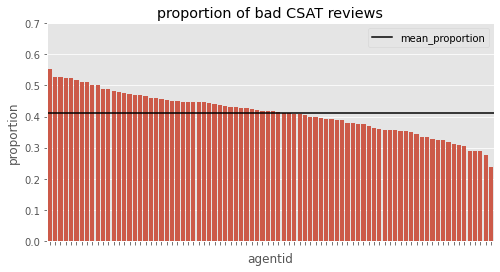

In [72]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=proportion_csat_tickets_agent.index,
            y='proportion',
            data=proportion_csat_tickets_agent,
            ax=ax,
            color='C0')

ax.axhline(proportion_csat_tickets_agent.proportion.mean(), color='k', label='mean_proportion')

ax.set(xticklabels=[], xlabel='agentid', title='proportion of bad CSAT reviews', ylim=(0, 0.7), ylabel='proportion')

ax.legend()

if save_figs:
    plt.savefig(r'../reports/figures/proportion_bad_tickets_per_agent.jpeg', **fig_kwargs)

In [73]:
# get mean reply time and full resolution time by agent for the BAD CSAT
meanreplytimeANDfullresolutiontime_badCSAT = badCSAT_tickets.groupby(['agentid']).agg(mean_reply_time=('replytime','mean'),
                                                                                      mean_full_resolution_time=('fullresolutiontime', 'mean')).reset_index()

In [74]:
def bootstrap_CI95(array, n_simulations=1000):
    """Compute 95% confidence intervals around the mean with bootstrapping aggregation.
    
    
    Parameters
    ----------
    array : list, np.array
        Numberical array with observations
    
    n_simulations : int
        Number of bootstrap simulations
        
    Returns 
    -------
    mean_and_ci95 : tuple(float, list(float, float))
        Mean and Confidence Interval at 95%.
    """
    
    
    bs_reps = []
    
    for i in range(n_simulations):
        
        bs_rep = np.random.choice(array, size=len(array))
        
        bs_reps.append(np.mean(bs_rep))
    
    mean = np.mean(bs_reps)
    
    ci95 = np.percentile(bs_reps, q=[2.5, 97.5])
    
    mean_and_ci95 = mean, ci95, bs_reps
    
    return mean_and_ci95

In [75]:
confidence_interval95 = bootstrap_CI95(proportion_csat_tickets_agent.proportion)

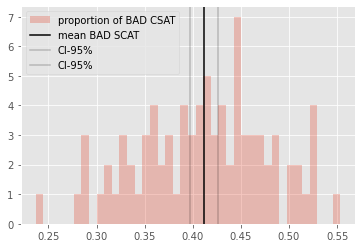

In [76]:
# Plot distribution of the data and the associated mean and confidence interval
fig, ax = plt.subplots()

ax.hist(proportion_csat_tickets_agent.proportion, bins=40, alpha=.3, label='proportion of BAD CSAT')

ax.axvline(proportion_csat_tickets_agent.proportion.mean(), color='k', label='mean BAD SCAT')

for ci in confidence_interval95[1]:
    ax.axvline(ci, color='k', alpha=.2, label='CI-95%')

    
ax.legend()

if save_figs:
    plt.savefig(r'../reports/figures/distribution_bad_proportion.jpeg', **fig_kwargs)

### Q. Is there a correlation between mean reply time and total proportion of bad reviews?
Yes. There is medium (0.65) positive correlation between total bad reviews and mean reply time.
This means that agents with bad reviews take longer to reply. This relation appears to be independent of the number of tickets that agents processed.

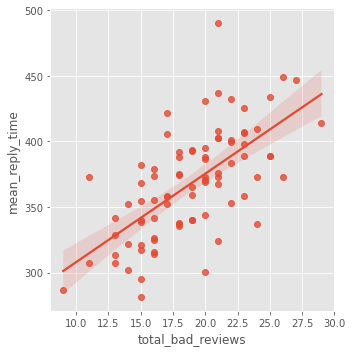

In [77]:
sns.lmplot(x='total_bad_reviews', y='mean_reply_time', data=proportion_csat_tickets_agent)

In [78]:
total_bad_reviews = proportion_csat_tickets_agent.total_bad_reviews
mean_reply_time = proportion_csat_tickets_agent.mean_reply_time

corr = np.corrcoef(total_bad_reviews, mean_reply_time)[0, 1].round(2)

print(f'There is medium ({corr}) positive correlation between total bad reviews and mean reply time.')
print('This means that agents with bad reviews take longer to reply.')

There is medium (0.65) positive correlation between total bad reviews and mean reply time.
This means that agents with bad reviews take longer to reply.


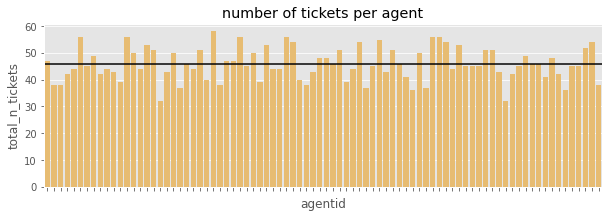

In [79]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.barplot(x=proportion_csat_tickets_agent.index, y='total_n_tickets', data=proportion_csat_tickets_agent, ax=ax, color='C4')

ax.axhline(proportion_csat_tickets_agent.total_n_tickets.mean(), color='k')

ax.set(xticklabels=[], xlabel='agentid', title='number of tickets per agent')

plt.show()

In [80]:
# summary statistics
summary_stats = df_tickets_with_satisfaction.groupby(['satisfaction'])\
                                            .agg(avg_cpc=('cpc', np.median),
                                                 avg_fullresolutiontime_days=('fullresolutiontime', np.mean),
                                                 avg_replytime_min=('replytime', np.mean),
                                                 n_tickets_resolved=('resolution', 'count'))


summary_stats.head()

,avg_cpc,avg_fullresolutiontime_days,avg_replytime_min,n_tickets_resolved
satisfaction,,,,
Bad,3.0,13.027152,653.185234,1585
Good,2.0,6.477999,165.721419,2266


---
2022 - Jose Oliveira da Cruz